In [130]:
#代码结构：
# binary_image(filename)——将图片转化为二值图像
# find_fa(x)——应用于two_pass(img, mask=255, area=100)函数，用于寻找同一连通域的根节点
# two_pass(img, mask=255, area=100)——删除较大连通域，实现图文分离
# showimg()——显示并保存图像

In [131]:
import numpy as np
from PIL import Image
import skimage.io
import cv2
from matplotlib import pyplot as plt

In [117]:

def binary_image(filename):
    img=cv2.imread(filename)
    GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # 中值滤波
    #删除，会影响结果精确度
    #GrayImage= cv2.medianBlur(GrayImage,5)
    #转化为二值图，其中阈值=140
    ret,img = cv2.threshold(GrayImage,140,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(th1)
    print(img.shape)
    return img

In [118]:
#来源：https://blog.csdn.net/csuhoward/article/details/78818244
#要用到两个库，cv2和numpy

#find father and update
#使用union-find结构
#https://blog.csdn.net/hemeinvyiqiluoben/article/details/39854315
def find_fa(x):
    global count,fa,cc

    fx = fa[x]#父节点指向子节点
    if fa[fx] == fx:#if father has no father, no more search
        return fx
    else:#update x's father
        fa[x] = find_fa(fx)
        return fa[x]

In [119]:
#种子填充法寻找连通域
def two_pass(img, mask=255, area=100):#255是白色的意思，100是连通区域阈值大小
    #init merge and find set
    global count,fa,cc
    fa = list(range(img.shape[0]*img.shape[1])) #父节点
    # range() 函数返回的是一个可迭代对象
    #img.shape[]是opencv里面的函数，其中shape[0]是垂直像素数量
    #https://blog.csdn.net/u014345473/article/details/80631467
    cc = np.zeros(img.shape[0]*img.shape[1]) #count connected components area of fa[]
    #初始的时候每个像素都默认为一个独立的连通域，并附初值为1
    cc = cc+1#全部置为1

    dx = [0,0,-1,1,-1,-1,1,1]
    dy = [-1,1,0,0,-1,1,-1,1]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i,j] == mask).any():
                for dir in range(8):#这是八连通
                    nx = dx[dir] + i
                    ny = dy[dir] + j
                    if nx >= 0 and nx < img.shape[0] and ny >= 0 and ny < img.shape[1] and (img[nx,ny] == mask).all():
                        a = i*img.shape[1]+j#a=X*总的行数+Y
                        b = nx*img.shape[1]+ny#b=新的标记值
                        pa = find_fa(a)#shorten chain
                         #pa是a的根节点
                        pb = find_fa(b)#
                        #pb是b的根节点
                        #merge father
                        if pa<pb:
                            fa[pb]=pa
                            cc[pa]+=cc[pb]#cc是用来计数的
                            cc[pb]=0
                        elif pa>pb:
                            fa[pa]=pb
                            cc[pb]+=cc[pa]
                            cc[pa]=0

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i,j] == mask).any():#白色
                a = i*img.shape[1]+j
                find_fa(a)#找a的爸爸就完了，这一步的操作是多余的

    count = 0
    colormap = np.zeros((img.shape[0],img.shape[1],3))#color hash table#这个是啥意思？
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i,j] == mask).any():
                a = i*img.shape[1]+j
                pa = find_fa(a)
                if cc[pa] <= 300: # connected components with area >= 100 pixels
                    pa_i = pa // img.shape[1]#改
                    pa_j = pa % img.shape[1]
                    if np.max(colormap[pa_i,pa_j,:]) == 0:
                        #彩色
                        colormap[pa_i,pa_j,:] = np.random.randint(256,size=3)
                        #白色
                        colormap[pa_i,pa_j,:] = np.array([255,255,255])
                        count += 1
                    colormap[i,j,:] = colormap[pa_i,pa_j,:]
    print(count)
    return colormap

In [128]:
#输入图片名称及格式，例如：（‘example.jpg’）
def showimg():
    img=binary_image('fig2.png')
    d=two_pass(img, mask=255, area=100)
    plt.imshow(d[:,:,:])#show
    cv2.imwrite("result\\fig2.jpg",d)#save

(2821, 4000)
2656


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


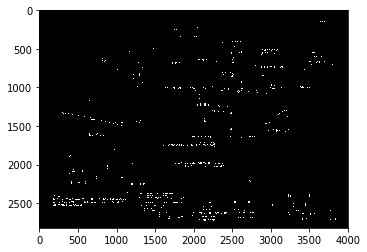

In [129]:
showimg()
   